In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage import data

from skimage.exposure import rescale_intensity
from skimage.morphology import reconstruction

In [3]:
moon = io.imread('moon.jpg')

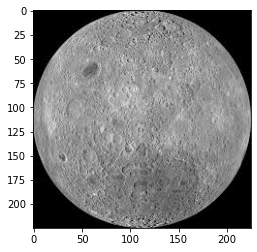

In [4]:
plt.imshow(moon,cmap='gray')

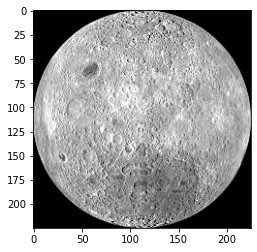

In [5]:
moon_rescaled = rescale_intensity(moon,in_range=(32,200))
plt.imshow(moon_rescaled,cmap='gray')

In [6]:
# erosion -> fill holes and to skrink an obj
erosion_seed = np.copy(moon_rescaled)
erosion_seed[1:-1,1:-1] = moon_rescaled.max() #except borders
mask = moon_rescaled

In [7]:
fill_holes = reconstruction(erosion_seed,mask, method='erosion')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


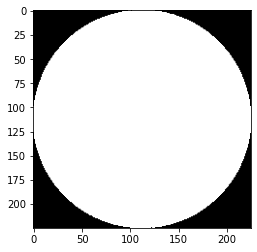

In [10]:
plt.imshow(fill_holes,cmap='gray')

In [16]:
dialation_seed = np.copy(moon_rescaled)
dialation_seed[1:-1,1:-1]=dialation_seed.min()
mask= moon_rescaled

In [18]:
highlight = reconstruction(dialation_seed,mask, method='dilation')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


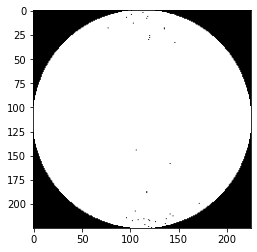

In [19]:
plt.imshow(highlight)

In [21]:
holes = fill_holes - moon_rescaled
peaks = highlight-moon_rescaled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


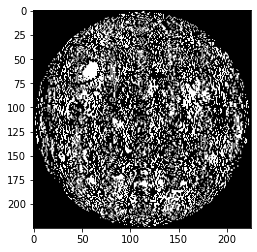

In [25]:
plt.imshow(holes,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


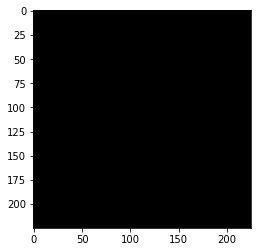

In [26]:
plt.imshow(peaks,cmap='gray')